# Winning streaks in MLB

## Defining a winning streak
A winning streak is a consecutive set of games won within a regular season.
- Winning streaks that started in one season, and extended/continued during the following year's season should not be considered.
- Do not permit tie games to extend a win streak - a win streak of 10 games means the team won 10 games in a row - no ties or losses.
- Exclude winning streaks of less than 7 games from your histogram - they are too common to be useful in our analysis.
- If there is a win streak of 10 games, it should be included in the 7, 8, 9, and 10 win streak bins.

In [1]:
from collections import namedtuple
from operator import attrgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys  
!{sys.executable} -m pip install --user matplotlib

Streak = namedtuple("Streak", "year team winpctg length")

win_pct_instances = []
def load(year):
    """Builds and returns a Games tuple with a prepared pandas df and teams list

    Parameters
    -----------
    year:   Year to load
    """
    filename = "data/GL" + str(year) + ".TXT"
    data = pd.read_csv(filename, header=None)
    data.rename(
        columns={0: "Date", 3: "Away", 6: "Home", 9: "VisitingRuns", 10: "HomeRuns"},
        inplace=True,
    )
    teams = data.Home.unique()
    return (data, teams, year)

In [2]:
def calculate_streaks(team, year, df):
    team_games = df[(df.Home == team) | (df.Away == team)]

    def outcome(x):
        if x.Home == team and x.HomeRuns > x.VisitingRuns:
            return 1
        elif x.Away == team and x.HomeRuns < x.VisitingRuns:
            return 1
        return 0

    team_games["outcomes"] = team_games.apply(outcome, axis=1)
    winpct = round(team_games.outcomes.sum() / len(team_games.outcomes), 3)
    win_pct_instances.append(winpct)
    current = 0
    streaks = []
    for g in team_games.outcomes.tolist():
        if g == 0:
            # loss, end of streak...
            if current >= 7:
                streaks.append(current)
            current = 0
        else:
            current = current + 1

    # won last game of season, see if it's a streak
    if current > 7:
        streaks.append(current)

    return [Streak(year, team, winpct, s) for s in streaks]
    # print(team, len(team_games))
    # print(team_games.Date.tolist())
    print(team, year)

In [3]:
all_streaks = []
for year in range(1962, 2019):
    games = load(year)
    for team in games[1]:
        streaks = calculate_streaks(team, year, games[0])
        all_streaks.extend(streaks)
        #print(year, team)

all_streaks = sorted(all_streaks, key=attrgetter("length"), reverse=True)
for streak in all_streaks[:20]:
    print(streak.team, streak.year, streak.winpctg, streak.length)


/home/sfrees/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


CLE 2017 0.63 22
OAK 2002 0.636 20
KCA 1977 0.63 16
MIN 1991 0.586 15
ATL 2000 0.586 15
SEA 2001 0.716 15
SFN 1965 0.583 14
BAL 1973 0.599 14
OAK 1988 0.642 14
TEX 1991 0.525 14
KCA 1994 0.557 14
SDN 1999 0.457 14
ATL 2013 0.593 14
CLE 2016 0.584 14
LAN 1962 0.618 13
LAN 1965 0.599 13
PHI 1977 0.623 13
BAL 1978 0.559 13
ATL 1982 0.549 13
MIL 1987 0.562 13


In [4]:
streak_lengths = list(set([streak.length for streak in all_streaks]))
print(streak_lengths)

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 20, 22]


In [5]:
wp_streaks = []
for length in streak_lengths:
    pcts = [streak.winpctg for streak in all_streaks if streak.length >= length]
    wp_streaks.append((length, len(pcts), round(sum(pcts) / len(pcts), 3), pcts))

print(wp_streaks)

[(7, 1133, 0.55, [0.63, 0.636, 0.63, 0.586, 0.586, 0.716, 0.583, 0.599, 0.642, 0.525, 0.557, 0.457, 0.593, 0.584, 0.618, 0.599, 0.623, 0.559, 0.549, 0.562, 0.481, 0.605, 0.481, 0.574, 0.552, 0.578, 0.568, 0.478, 0.568, 0.549, 0.597, 0.599, 0.543, 0.519, 0.435, 0.568, 0.531, 0.593, 0.586, 0.574, 0.636, 0.604, 0.506, 0.628, 0.617, 0.667, 0.469, 0.519, 0.599, 0.639, 0.532, 0.602, 0.593, 0.547, 0.587, 0.5, 0.481, 0.552, 0.602, 0.59, 0.667, 0.414, 0.593, 0.562, 0.463, 0.593, 0.5, 0.451, 0.54, 0.605, 0.546, 0.63, 0.574, 0.556, 0.543, 0.593, 0.552, 0.586, 0.568, 0.543, 0.556, 0.599, 0.457, 0.574, 0.574, 0.556, 0.574, 0.636, 0.642, 0.623, 0.509, 0.578, 0.624, 0.565, 0.574, 0.401, 0.586, 0.531, 0.537, 0.606, 0.5, 0.568, 0.549, 0.506, 0.574, 0.617, 0.5, 0.5, 0.457, 0.562, 0.667, 0.594, 0.398, 0.531, 0.568, 0.63, 0.574, 0.547, 0.568, 0.519, 0.503, 0.543, 0.59, 0.594, 0.571, 0.617, 0.564, 0.556, 0.577, 0.537, 0.5, 0.475, 0.515, 0.549, 0.537, 0.531, 0.543, 0.478, 0.593, 0.525, 0.494, 0.584, 0.619, 

In [6]:
team_seasons = len(win_pct_instances)
team_seasons

1518

In [7]:
s = np.random.normal(0.500, .060, team_seasons)

In [8]:
len(s)

1518

In [9]:
s

array([0.55827743, 0.5187637 , 0.56123495, ..., 0.58604901, 0.48988369,
       0.47947509])

In [10]:
np.mean(s)

0.4991948218479559

In [11]:
min(s)

0.2884247812940678

In [12]:
p = [p**10 for p in s]
np.mean(p)

0.0016815298660990338

[1183, 646, 357, 200, 113, 64, 37, 22, 13, 7, 1, 0]
[1133, 614, 332, 184, 91, 41, 24, 14, 6, 3, 2, 1]
12
12


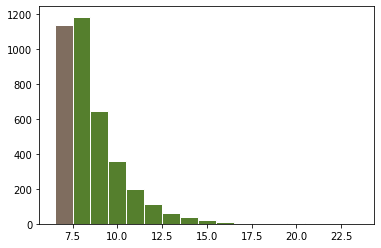

In [26]:
observed = [s[1]  for s in wp_streaks]
expected = []
for k in streak_lengths:
    stks = [wp**k*((162-k)*(1-wp)+1) for wp in win_pct_instances]  # use s for sample
    expected.append(int(round(sum(stks), 0)))

print(expected)
print(observed)
observed = [s[1] for s in wp_streaks]

barWidth = 1

print(len(observed))
print(len(expected))

sk = 0
r1 = np.arange(len(observed[sk:]))
r2 = [x + barWidth for x in r1]
plt.bar(streak_lengths, observed[sk:], color='#7f6d5f', width=barWidth, edgecolor='white', label='observed')
plt.bar([s+1 for s in streak_lengths], expected[sk:], color='#557f2d', width=barWidth, edgecolor='white', label='expected')


plt.show()

In [ ]:
win_pct_instances

In [ ]:
expected = []
for k in streak_lengths:
    stks = [wp**k*((162-k)*(1-wp)+1) for wp in win_pct_instances]
    expected.append(int(round(sum(stks), 0)))

print(expected)
print(observed)
observed = [s[1] for s in wp_streaks]

barWidth = 0.5

print(len(observed))
print(len(expected))

sk = 0
r1 = np.arange(len(observed[sk:]))
r2 = [x + barWidth for x in r1]
plt.bar(r1, observed[sk:], color='#7f6d5f', width=barWidth, edgecolor='white', label='observed')
plt.bar(r2, expected[sk:], color='#557f2d', width=barWidth, edgecolor='white', label='expected')


plt.show()

In [ ]:
import statistics
for s in wp_streaks:
    print(s[0], np.mean(s[3]), statistics.stdev(s[3]))